In [1]:
%load_ext autoreload
%autoreload 2
import cv2
import numpy as np
import torch
import torch.nn as nn
from utils import *
from dataloaders.RealBlur import *
import matplotlib.pyplot as plt
from torchvision import transforms
import einops
from dataloaders.ImageNet import ImageNet

In [2]:
dataset = ImageNet()
print(dataset.filenames)

['/Users/sagarasanghavi/Desktop/Photos/IMG_1042.jpg', '/Users/sagarasanghavi/Desktop/Photos/IMG_1081.jpg', '/Users/sagarasanghavi/Desktop/Photos/IMG_1252.jpg', '/Users/sagarasanghavi/Desktop/Photos/Gradphoto.jpg', '/Users/sagarasanghavi/Desktop/Photos/Photo.jpg', '/Users/sagarasanghavi/Desktop/Photos/IMG_4493.jpg']


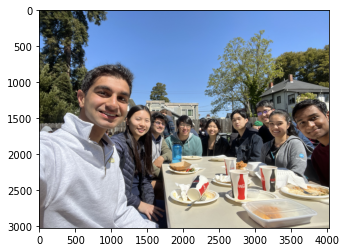

In [3]:
# PSNR sanity check
def show_image(img):
    plt.figure()
    plt.imshow(cv2.cvtColor(img.transpose((1, 2, 0)), cv2.COLOR_BGR2RGB))
    plt.show()

_, gt = dataset[0]
show_image(gt)

In [4]:
from models.axialtransformer import *

blur, gt = dataset[0]

cropped_image = gt[None, :, :512, :512]
cropped_blur = blur[None, :, :512, :512]

cropped_image_torch = torch.from_numpy(cropped_image).float()
print(cropped_image_torch.shape)

conv1x1 = nn.Conv2d(3, 128, 1)
transformer = AxialImageTransformer(dim=128, depth=12, reversible=True)

out = transformer(conv1x1(cropped_image_torch))
print(out.shape)

torch.Size([1, 3, 512, 512])


: 

: 

In [2]:
from models.axialtransformer import AxialImageTransformer

conv1x1 = nn.Conv2d(3, 128, 1)

transformer = AxialImageTransformer(
    dim = 128,
    depth = 12,
    reversible = True
)

img = torch.randn(1, 3, 512, 512)
print(img.shape)

transformer(conv1x1(img))

torch.Size([1, 3, 512, 512])


: 

: 